In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Data/NFL Play by Play 2009-2017 (v4).csv')
df.head()

/tmp/ipykernel_38485/1755950925.py:1: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/NFL Play by Play 2009-2017 (v4).csv')


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [4]:
np.random.seed(0)

In [5]:
missing_values_count = df.isna().sum()

In [6]:
missing_values_count[:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

In [7]:
missing_values_count.sum()

11505187

In [9]:
np.product(df.shape)-missing_values_count.sum()

30078989

In [9]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

In [10]:

data = np.random.exponential(size=1000)
data

array([7.95874508e-01, 1.25593076e+00, 9.23223146e-01, 7.87201152e-01,
       5.51048491e-01, 1.03815929e+00, 5.75519199e-01, 2.22352441e+00,
       3.31491218e+00, 4.83602101e-01, 1.56889614e+00, 7.52674110e-01,
       8.39432847e-01, 2.59825415e+00, 7.36853549e-02, 9.11610291e-02,
       2.04255867e-02, 1.78748768e+00, 1.50578423e+00, 2.04031428e+00,
       3.84522184e+00, 1.60523956e+00, 6.18929459e-01, 1.51653598e+00,
       1.25874412e-01, 1.02143189e+00, 1.54729683e-01, 2.89442045e+00,
       7.37827278e-01, 5.35565718e-01, 3.07280353e-01, 1.48825484e+00,
       6.09082416e-01, 8.40334707e-01, 1.89685717e-02, 9.61380929e-01,
       9.46996678e-01, 9.59547973e-01, 2.87791508e+00, 1.14513896e+00,
       4.45518493e-01, 5.74532409e-01, 1.19610780e+00, 6.21152959e-02,
       1.09891248e+00, 1.11059743e+00, 2.36206705e-01, 1.38028688e-01,
       3.78961966e-01, 4.52102056e-01, 8.44427781e-01, 5.77324311e-01,
       4.45449738e+00, 1.07635113e-01, 2.34301516e-01, 1.75913553e-01,
      

In [15]:
scaled_data = minmax_scaling(data,columns=[0])
scaled_data

array([[9.29069355e-02],
       [1.46648782e-01],
       [1.07783271e-01],
       [9.18937503e-02],
       [6.43073845e-02],
       [1.21209631e-01],
       [6.71659502e-02],
       [2.59679024e-01],
       [3.87170377e-01],
       [5.64285794e-02],
       [1.83208088e-01],
       [8.78604457e-02],
       [9.79952384e-02],
       [3.03453385e-01],
       [8.54382012e-03],
       [1.05852553e-02],
       [2.32223683e-03],
       [2.08743037e-01],
       [1.75835619e-01],
       [2.38277183e-01],
       [4.49118933e-01],
       [1.87453574e-01],
       [7.22369551e-02],
       [1.77091593e-01],
       [1.46403274e-02],
       [1.19255605e-01],
       [1.80110794e-02],
       [3.38050292e-01],
       [8.61261010e-02],
       [6.24987517e-02],
       [3.58314105e-02],
       [1.73787909e-01],
       [7.10866648e-02],
       [9.81005899e-02],
       [2.15203443e-03],
       [1.12240703e-01],
       [1.10560395e-01],
       [1.12026585e-01],
       [3.36122204e-01],
       [1.33706547e-01],


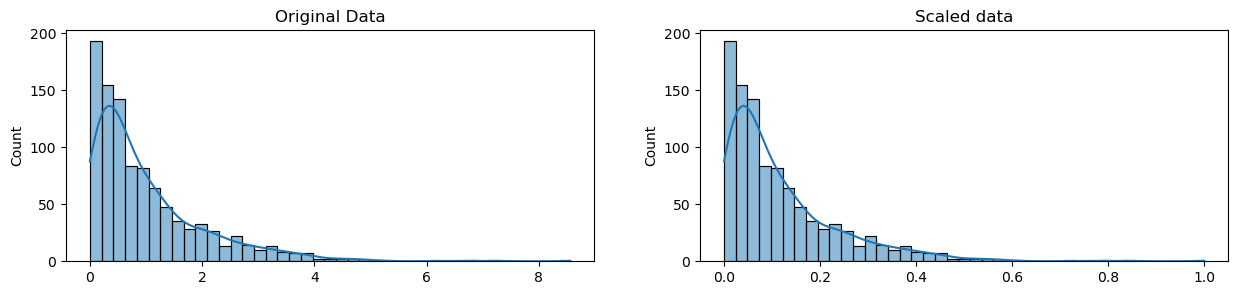

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

<Axes: ylabel='Count'>

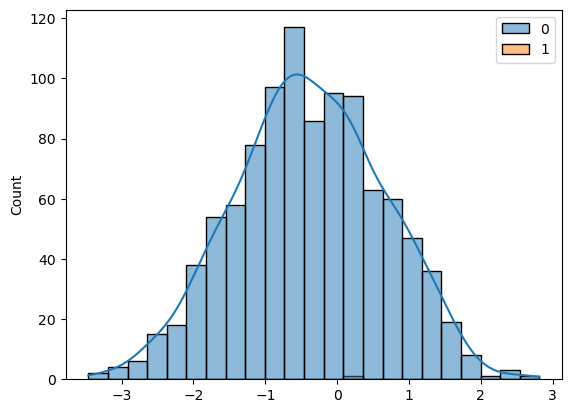

In [17]:
stats.boxcox(data)
sns.histplot(stats.boxcox(data),kde=True)

In [18]:
# modules we'll use
import pandas as pd
import numpy as np

# helpful character encoding module
import charset_normalizer

# set seed for reproducibility
np.random.seed(0)

In [19]:
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

In [20]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors="replace")

# check the type
type(after)

bytes

In [21]:
after

b'This is the euro symbol: \xe2\x82\xac'

In [22]:
print(after.decode("utf-8"))

This is the euro symbol: €


In [23]:
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(


This is the euro symbol: ?
